# Challenge Description
The data is available as two attached CSV files: takehome_user_engagement.csv and takehome_users.csv The data has the following two tables:


1] A user table ("takehome_users") with data on 12,000 users who signed up for the product in the last two years. This table includes:

- name: the user's name
- object_id: the user's id
- email: email address
- creation_source: how their account was created. This takes on one of 5 values:
   
       ○ PERSONAL_PROJECTS: invited to join another user's personal workspace<br>
       ○ GUEST_INVITE: invited to an organization as a guest (limited permissions)
       ○ ORG_INVITE: invited to an organization (as a full member)
       ○ SIGNUP: signed up via the website
       ○ SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)
- creation_time: when they created their account
- last_session_creation_time: unix timestamp of last login
- opted_in_to_mailing_list: whether they have opted into receiving marketing emails
- enabled_for_marketing_drip: whether they are on the regularmarketing email drip
- org_id: the organization (group of users) they belong to
- invited_by_user_id: which user invited them to join (if applicable).


2] A usage summary table ("takehome_user_engagement") that has a row for each day that a user logged into the product.

Your Task: Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period, identify which factors predict future user adoption.


We suggest spending 1-2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better ­­ no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_users = pd.read_csv('takehome_users.csv', encoding='latin-1')
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
df_engagement = pd.read_csv('takehome_user_engagement.csv')
df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [6]:
# each dataframe contains 12,000 different users
print(df_engagement.user_id.max())
print(df_users.object_id.max())

12000
12000


In [7]:
# convert the 'time_stamp' columns into datetimes.
df_engagement['time_stamp'] = pd.to_datetime(df_engagement['time_stamp'])
df_engagement = df_engagement.set_index('time_stamp')
df_engagement.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [8]:
# determine the number of times each user signed in every week 
user_logins_per_week = df_engagement.groupby('user_id').resample('1W').sum()

In [9]:
user_logins_per_week = user_logins_per_week.drop('user_id', axis=1)
user_logins_per_week.head(20)

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-11-24        0
        2013-12-01        1
        2013-12-08        0
        2013-12-15        1
        2013-12-22        0
        2013-12-29        1
        2014-01-05        1
        2014-01-12        1
        2014-01-19        0
        2014-01-26        0
        2014-02-02        0
        2014-02-09        3
        2014-02-16        2
        2014-02-23        0
        2014-03-02        0
        2014-03-09        1
        2014-03-16        1
        2014-03-23        0

In [10]:
user_logins_per_week = user_logins_per_week.reset_index()
user_logins_per_week.head()

,user_id,time_stamp,visited
0,1,2014-04-27,1
1,2,2013-11-17,1
2,2,2013-11-24,0
3,2,2013-12-01,1
4,2,2013-12-08,0


In [11]:
# for all 12,000 users, determine who was adopted and who wasn't
adopted_users = []
for i in range(1, user_logins_per_week.user_id.max()+1):
    tmp = user_logins_per_week[user_logins_per_week['user_id']==i]
    if np.any(tmp.visited.values >= 3):
        adopted_users.append([i, 1]) # is an active user
    else:
        adopted_users.append([i, 0]) # is not an active user

In [12]:
adopted_users = pd.DataFrame(adopted_users)
adopted_users.columns = ['object_id', 'adopted']
adopted_users.head()

,object_id,adopted
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [13]:
# merge the datasets so that df_users has a new column was each user indicating if they were adopted.
df_users = df_users.merge(adopted_users, on='object_id')
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [14]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted                       12000 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.1+ MB


In [15]:
# clean the 'invited_by_user_id' column so that it is just 1 if a user was invited, and 0 if they were not.
df_users['invited_by_user_id'] = df_users['invited_by_user_id'].fillna(0)
def invited_by_user(user_num):
    if user_num > 0:
        return 1
    else:
        return user_num
df_users['invited_by_user_id'] = df_users['invited_by_user_id'].map(invited_by_user)
df_users = df_users.rename(columns={"invited_by_user_id": "invited_by_user"})
df_users.head(100)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,1.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,1.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,1.0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,1.0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,0.0,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,0.0,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,1.0,1


In [16]:
# remove irrelevant columns
data = df_users.drop(['creation_time', 'name', 'object_id', 'email', 'last_session_creation_time'], axis=1)
data.head()


,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user,adopted
0,GUEST_INVITE,1,0,11,1.0,0
1,ORG_INVITE,0,0,1,1.0,1
2,ORG_INVITE,0,0,94,1.0,0
3,GUEST_INVITE,0,0,1,1.0,0
4,GUEST_INVITE,0,0,193,1.0,0


In [17]:
# create dummy variables for all categorical data columns
data = pd.get_dummies(data, columns=['creation_source', 'opted_in_to_mailing_list', \
                                     'enabled_for_marketing_drip', 'invited_by_user'], drop_first=True)

In [18]:
# before beginning with predictive modeling, have to account for the class discrepency in the target variable
data['adopted'].value_counts()

0    10555
1     1445
Name: adopted, dtype: int64

In [19]:
# use undersampling in order to choose an equal number of adopted and non-adopted users
data_class_0 = data[data['adopted'] == 0]
data_class_1 = data[data['adopted'] == 1]

count_class_0, count_class_1 = data['adopted'].value_counts()

data_under_0 = data_class_0.sample(count_class_1)
data = pd.concat([data_under_0, data_class_1], axis=0).reset_index(drop=True)
data['adopted'].value_counts()

1    1445
0    1445
Name: adopted, dtype: int64

In [20]:
# seperate features and target variables and create both a test set and training set.
from sklearn.model_selection import train_test_split

X = data.drop('adopted', axis=1).values
y = data.adopted.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
# instantiate random forest classifer and see how it performs 'out of the box'
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
score = rfc.score(X_test, y_test) 
print('Random Forest Classifier Test Set Performance: %3.2f' %score)

Random Forest Classifier Test Set Performance: 0.51


/anaconda3/envs/datatools/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
# make sure classifier is not just always predicting the more common class
pd.Series(predictions).value_counts()

0    456
1    411
dtype: int64

In [23]:
# tune the hyperparameters of the random forest classifier to try and get better performance.
# best hyperparameters are determined using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': np.arange(2, 6),
    'min_samples_split': np.arange(2, 12)
}

rfc = RandomForestClassifier()
gscv = GridSearchCV(rfc, param_grid=param_grid, cv=3)
gscv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10, 15], 'n_estimators': [50, 100, 200], 'min_samples_leaf': array([2, 3, 4, 5]), 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
gscv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 50}

In [29]:
rfc = RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=50)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
score = rfc.score(X_test, y_test) 
print('Random Forest Classifier Test Set Performance: %3.2f' %score)

Random Forest Classifier Test Set Performance: 0.55


In [26]:
pd.Series(predictions).value_counts()

1    558
0    309
dtype: int64

In [27]:
feature_importances = pd.DataFrame(rfc.feature_importances_, \
                                   index = data.drop(columns=['adopted']).columns, \
                                   columns=['importance']).sort_values('importance', ascending=False)

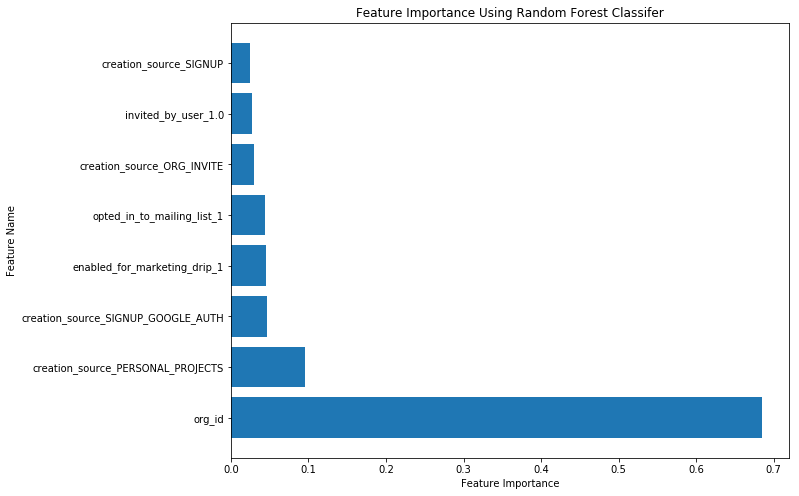

In [28]:
plt.figure(figsize=(10,8))
plt.barh(feature_importances.index, feature_importances.importance.values)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Using Random Forest Classifer');

The list of most predictive factors can be seen above. 